# Curve fitting and regression examples with Python

## Polynomial regression

Coefficients:
           4         3             2
0.001155 x - 8.552 x + 2.355e+04 x - 2.852e+07 x + 1.28e+10
r_2= 0.9526609315035622


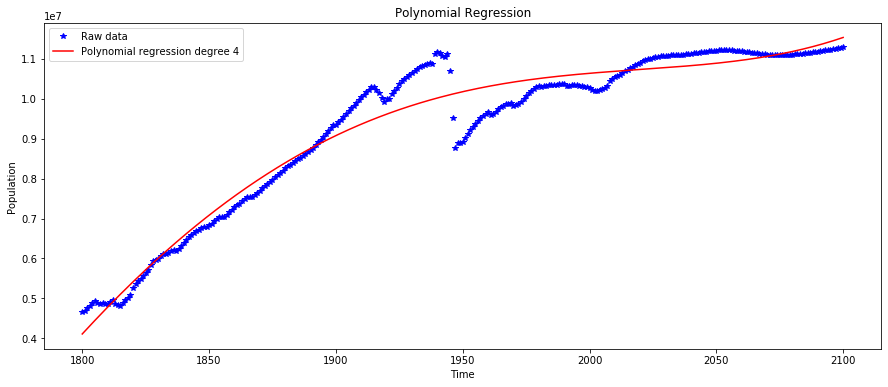

In [3]:
# Imports and data prep
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = "regression_examples.xlsx"
data = pd.read_excel(file, sheet_name = "Pop")

X = data["year"].values
y = data["population"].values

# Setting the degree of the polynomial regression
degree = 4
poly = np.poly1d(np.polyfit(X, y, degree))

# Saving the results of the regression
population_smoothed_poly = poly(X)

# print the regression coefficients and r_2 value
print("Coefficients:\n", poly)
r_2 = np.corrcoef(poly(X), y)[0,1]**2
print('r_2=', r_2)

# Plotting the Polynomial Regression results 
plt.figure(figsize=(15,6))
plt.plot(X, y, 'b*', label='Raw data')
plt.plot(X, poly(X) , color = 'red', label = 'Polynomial regression degree %s' % degree) 
plt.title('Polynomial Regression') 
plt.xlabel('Time') 
plt.ylabel('Population') 
plt.legend(loc='best') 
plt.show() 


## Logistic function

### Manual logistic function

This code can be used to generate data according to a logistic function, where you define yourself the shape parameters. This can be useful if you have very little data available for some parameters.

You can try to see what happens if you change the value of the parameters.

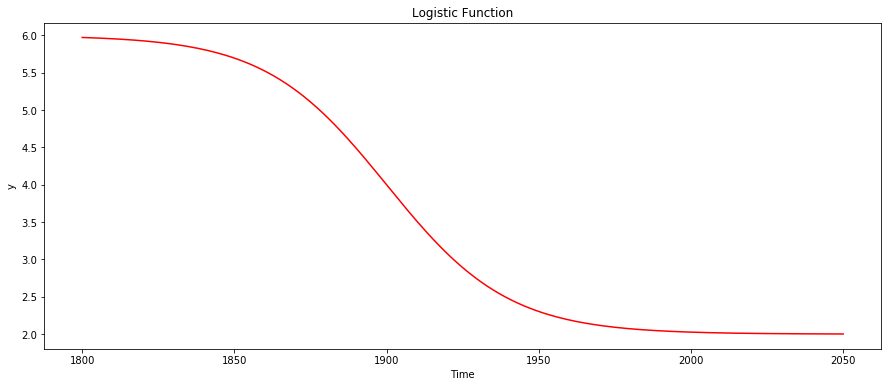

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def logistic(ti,tau,C0,C1,x):
    """
    ti: inflection time
    tau: transition time coefficient
    C0: start value
    C1: end value
    x: vector of observation points (time)
    """

    return [(C1 - C0)/(1 + np.exp(-(x-ti)/tau)) + C0 for x in x]

# Functions parameters
x = [year for year in range(1800, 2051)] 
C0 = 6
C1 = 2
ti = 1900
tau = 20

y = logistic(ti,tau,C0,C1,x)


# Visualising the logistic function 
plt.figure(figsize=(15,6))
plt.plot(x, y, color = 'red') 
plt.title('Logistic Function') 
plt.xlabel('Time') 
plt.ylabel('y') 
plt.show() 

### Fit data with a logistic function

Logistic regression parameters: [1925.03503712   23.28235401    6.02120687    1.9838773 ]


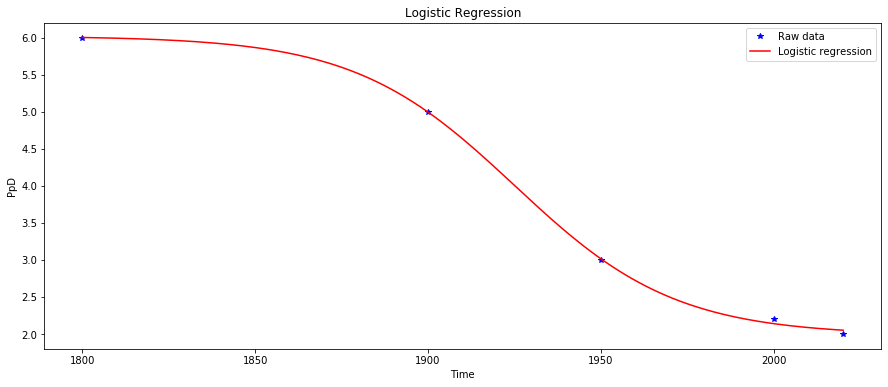

In [5]:
# Imports and data prep
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

file = "regression_examples.xlsx"
data = pd.read_excel(file, sheet_name = "PpD")

xdata = data.year
ydata = data.ppd

# Definition of logistic function
def logistic(x,ti,tau,C0,C1):
    """
    ti: inflection time
    tau: transition time coefficient
    C0: start value
    C1: end value
    x: vector of observation points (time)
    """

    return (C1 - C0)/(1 + np.exp(-(x - ti) / tau)) + C0  


# curve fitting using the logistic function
# it might be necessary to adjust the bounds argument, 
# determining the extreme acceptable value for the parameters of the logistic function.
# Bounds are set as ([low_ti, low_tau, low_Co, low_C1],[high_ti,high_tau, high_Co, high_C1 ])
popt, pcov = curve_fit(logistic, xdata, ydata, bounds=([min(xdata), 5., 5., 0.], [max(xdata), 50., 10., 5.]))

print('Logistic regression parameters:', popt)



# as we do not have many data points, we create a linspace to plot the curve
x = np.linspace(min(xdata), max(xdata), max(xdata) - min(xdata))
ppd_smoothed_logistic =  logistic(x, *popt)

plt.figure(figsize=(15,6))
plt.plot(xdata, ydata, 'b*', label='Raw data')
plt.title('Logistic Regression') 
plt.xlabel('Time') 
plt.ylabel('PpD') 
plt.plot(x, ppd_smoothed_logistic, 'r-', label='Logistic regression' )
plt.legend(loc='best') 
plt.show()



## Example with dummy FApC data - Which regression method fits best?

Logistic regression parameters: [2005.64634702   13.8838022    11.44349431   29.83735076]

r_2 logistic= 0.9699677383952224

Polynomial Regression Coefficients:
           4           3         2
7.14e-06 x - 0.05663 x + 168.4 x - 2.227e+05 x + 1.104e+08

r_2 polynomial= 0.9989104632642154


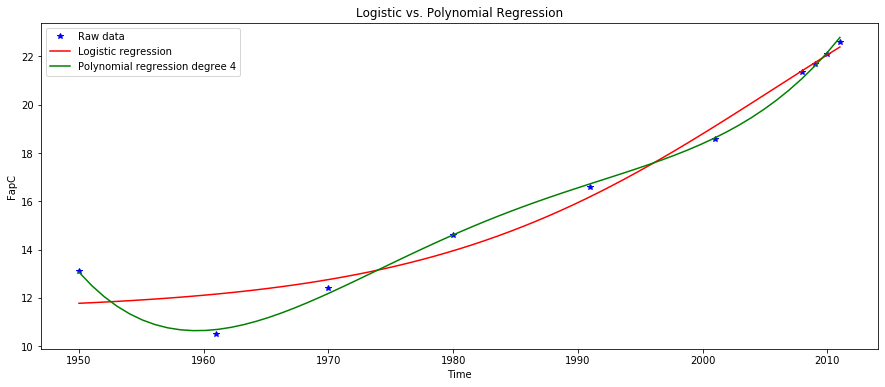

In [6]:
# Imports and data prep
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

file = "regression_examples.xlsx"
data = pd.read_excel(file, sheet_name = "FApC")

xdata = data.year
ydata = data.fapc

# Definition of logistic function
def logistic(x,ti,tau,C0,C1):
    """
    ti: inflection time
    tau: transition time coefficient
    C0: start value
    C1: end value
    x: vector of observation points (time)
    """

    return (C1 - C0)/(1 + np.exp(-(x - ti) / tau)) + C0  


# curve fitting using the logistic function, the bounds have been adjusted
popt, pcov = curve_fit(logistic, xdata, ydata, bounds=([min(xdata), 5., 5., 20.], [max(xdata), 50., 20., 50.]))

# Curve fitting with a polynomial regression of degree 4
degree = 4
poly = np.poly1d(np.polyfit(xdata, ydata, degree))

# printing the regression coefficients and r_2 value
print('Logistic regression parameters:', popt)
r_2 = np.corrcoef(logistic(xdata, *popt), ydata)[0,1]**2
print('\nr_2 logistic=', r_2)
print("\nPolynomial Regression Coefficients:\n", poly)
r_2 = np.corrcoef(poly(xdata), ydata)[0,1]**2
print('\nr_2 polynomial=', r_2)

# Saving the results of the regression and creating a linspace for plotting
x = np.linspace(min(xdata), max(xdata), max(xdata) - min(xdata))
fapc_smoothed_logistic =  logistic(x, *popt) 
fapc_smoothed_poly = poly(x)

# Plotting the Polynomial Regression results 
plt.figure(figsize=(15,6))
plt.plot(xdata, ydata, 'b*', label='Raw data')
plt.plot(x, fapc_smoothed_logistic, 'r-', label='Logistic regression' )
plt.plot(x, fapc_smoothed_poly , color = 'g', label = 'Polynomial regression degree %s' % degree) 
plt.title('Logistic vs. Polynomial Regression') 
plt.xlabel('Time') 
plt.ylabel('FapC') 
plt.legend(loc='best') 
plt.show()



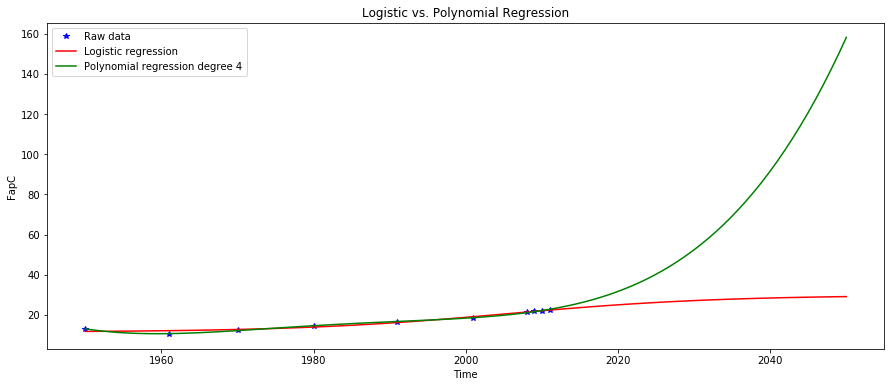

In [8]:
# Beware of overfitting to current data and compromising future data:
# Keep targets and trends in mind - What makes more sense for the model?
x = np.linspace(min(xdata), 2050, 2050 - min(xdata))
fapc_smoothed_logistic =  logistic(x, *popt) 
fapc_smoothed_poly = poly(x)

# Plotting the Polynomial Regression results 
plt.figure(figsize=(15,6))
plt.plot(xdata, ydata, 'b*', label='Raw data')
plt.plot(x, fapc_smoothed_logistic, 'r-', label='Logistic regression' )
plt.plot(x, fapc_smoothed_poly , color = 'g', label = 'Polynomial regression degree %s' % degree) 
plt.title('Logistic vs. Polynomial Regression') 
plt.xlabel('Time') 
plt.ylabel('FapC') 
plt.legend(loc='best') 
plt.show()

